# Chuẩn hoá dữ liệu với Robust Scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,44.504479,6.455671,13.258403,0.884242,16.165706
1,25.071919,3.714716,14.193516,-0.408441,21.088770
2,49.087490,4.517754,12.280146,-3.260145,21.567941
3,41.511649,5.188290,10.608138,12.799780,17.130794
4,52.601832,2.061643,6.838610,15.197490,20.120073


## Trực quan hóa dữ liệu sinh ra

<AxesSubplot:ylabel='Density'>

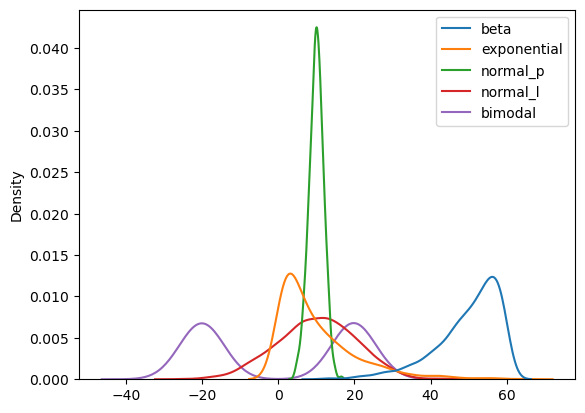

In [5]:
sns.kdeplot(df)

In [7]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.943660,10.059547,9.972105,10.056848,-0.148280
std,8.446032,10.203218,1.924853,10.286861,20.219145
min,12.687036,0.006451,4.291386,-24.688701,-31.206293
25%,45.874594,2.724067,8.704262,3.262675,-20.053196
50%,52.104202,6.743391,10.009707,10.336551,-1.113440
75%,56.406343,14.255259,11.260086,17.343234,19.777114
max,59.993611,64.394966,16.582700,43.358349,29.281265


## Thêm một đặc trưng với giá trị lớn hơn nhiều

<AxesSubplot:ylabel='Density'>

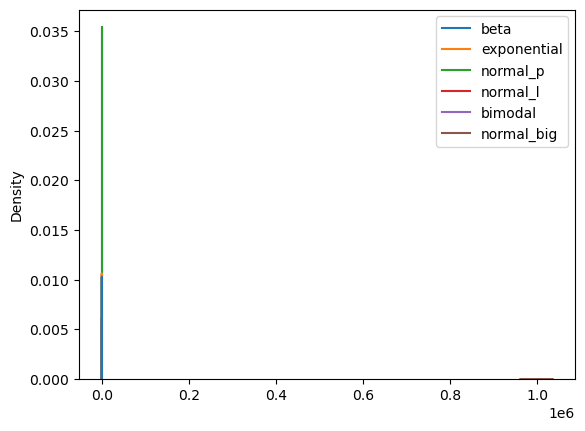

In [8]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

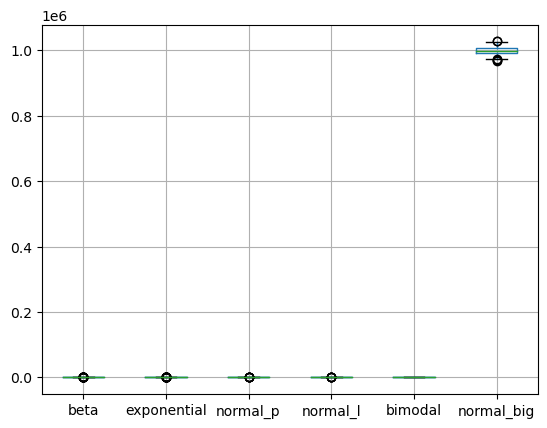

In [9]:
df.boxplot()

## Chuẩn hóa với Robust Scaling

In [10]:
scaler = RobustScaler()

In [11]:
df_s = scaler.fit_transform(df)
col_names = list(df.columns)
df_s = pd.DataFrame(df_s, columns=col_names)

In [12]:
df_s.head()


,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-0.721601,-0.024951,1.271096,-0.671302,0.433819,-0.076450
1,-2.566742,-0.262651,1.636971,-0.763108,0.557420,-1.481107
2,-0.286440,-0.193010,0.888339,-0.965636,0.569450,0.846550
3,-1.005773,-0.134860,0.234144,0.174938,0.458049,-0.010659
4,0.047251,-0.406007,-1.240734,0.345223,0.533099,-0.527478


<AxesSubplot:ylabel='Density'>

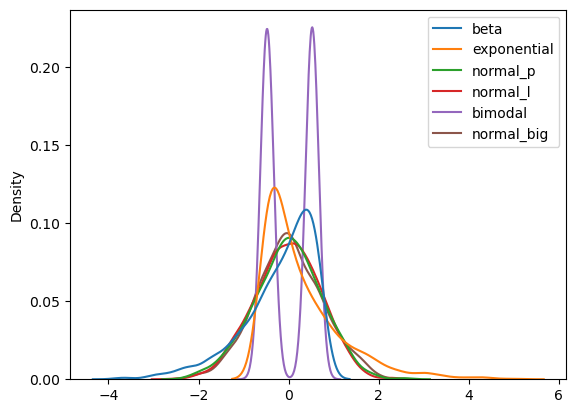

In [13]:
sns.kdeplot(data=df_s)


In [14]:
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,-0.205146,0.287581,-1.471244e-02,-1.986450e-02,0.024232,1.313722e-02
std,0.801959,0.884836,7.531244e-01,7.305719e-01,0.507632,7.447816e-01
min,-3.742699,-0.584236,-2.237369e+00,-2.487490e+00,-0.755526,-2.266845e+00
25%,-0.591507,-0.348561,-5.107727e-01,-5.023860e-01,-0.475511,-4.807130e-01
50%,0.000000,0.000000,3.475116e-16,-6.310057e-17,0.000000,-4.305042e-15
75%,0.408493,0.651439,4.892273e-01,4.976140e-01,0.524489,5.192870e-01
max,0.749107,4.999620,2.571771e+00,2.345205e+00,0.763105,2.078385e+00


<AxesSubplot:>

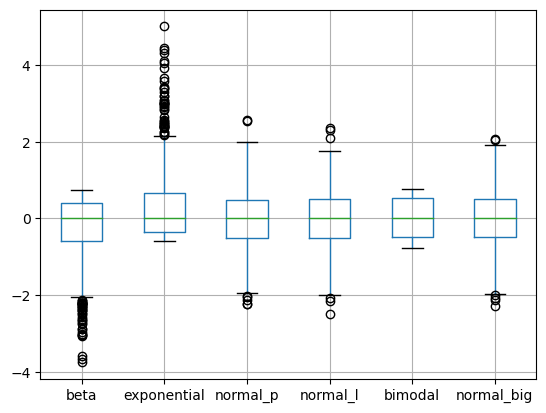

In [15]:
df_s.boxplot()

In [16]:
# lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.7426989286138603,
 -0.58423619945147,
 -2.237369169907551,
 -2.4874902127966685,
 -0.7555264365757592,
 -2.2668452759029303]

In [17]:
# lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.7491072376394449,
 4.9996198155735945,
 2.5717707104213394,
 2.3452050110755174,
 0.763104923005,
 2.0783854151297736]

In [18]:
# giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_

array([ 5.21042017e+01,  6.74339094e+00,  1.00097072e+01,  1.03365513e+01,
       -1.11344048e+00,  9.99212267e+05])